<a href="https://colab.research.google.com/github/Yuichiro3/YuichiroKobayashi/blob/main/SEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install semopy

In [ ]:
pip install graphviz

In [ ]:
pip install see

In [ ]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from see import see
import graphviz
import semopy
from semopy import Model

In [ ]:
# read datasets 
df_all = pd.read_csv("datasets_for_SEM(structural equation modeling) - datasets.csv")
df_all.head()

,Tool,ui_1,ui_2,ui_3,ux_1,ux_2,ux_3,cs_1,cs_2,cs_3,sf_1,sf_2,sf_3
0,A,5,4,5,5,5,5,5,5,4,5,4,5
1,A,4,5,4,4,4,4,5,4,5,4,4,5
2,B,3,4,3,2,2,3,4,3,2,3,4,2
3,C,3,2,3,1,2,3,3,3,1,3,3,1
4,C,1,3,1,1,2,1,2,3,2,1,3,2


In [ ]:
df_all_2 = df_all
df_all_3 = df_all_2.drop('Tool',axis=1)
df_all_3

,ui_1,ui_2,ui_3,ux_1,ux_2,ux_3,cs_1,cs_2,cs_3,sf_1,sf_2,sf_3
0,5,4,5,5,5,5,5,5,4,5,4,5
1,4,5,4,4,4,4,5,4,5,4,4,5
2,3,4,3,2,2,3,4,3,2,3,4,2
3,3,2,3,1,2,3,3,3,1,3,3,1
4,1,3,1,1,2,1,2,3,2,1,3,2
5,4,4,5,5,5,5,5,5,5,4,4,4
6,2,3,3,4,4,3,2,3,2,3,4,4
7,5,5,4,4,5,4,5,5,5,4,4,5
8,2,3,4,4,3,2,2,3,3,2,2,2
9,3,4,2,4,4,3,3,4,2,3,2,4


In [ ]:
# 標準化（standardization）
df_all_4 = (df_all_3 - df_all_3.values.mean()) / df_all_3.values.std(ddof=1)
df_all_4

,ui_1,ui_2,ui_3,ux_1,ux_2,ux_3,cs_1,cs_2,cs_3,sf_1,sf_2,sf_3
0,1.300644,0.485619,1.300644,1.300644,1.300644,1.300644,1.300644,1.300644,0.485619,1.300644,0.485619,1.300644
1,0.485619,1.300644,0.485619,0.485619,0.485619,0.485619,1.300644,0.485619,1.300644,0.485619,0.485619,1.300644
2,-0.329406,0.485619,-0.329406,-1.144431,-1.144431,-0.329406,0.485619,-0.329406,-1.144431,-0.329406,0.485619,-1.144431
3,-0.329406,-1.144431,-0.329406,-1.959456,-1.144431,-0.329406,-0.329406,-0.329406,-1.959456,-0.329406,-0.329406,-1.959456
4,-1.959456,-0.329406,-1.959456,-1.959456,-1.144431,-1.959456,-1.144431,-0.329406,-1.144431,-1.959456,-0.329406,-1.144431
5,0.485619,0.485619,1.300644,1.300644,1.300644,1.300644,1.300644,1.300644,1.300644,0.485619,0.485619,0.485619
6,-1.144431,-0.329406,-0.329406,0.485619,0.485619,-0.329406,-1.144431,-0.329406,-1.144431,-0.329406,0.485619,0.485619
7,1.300644,1.300644,0.485619,0.485619,1.300644,0.485619,1.300644,1.300644,1.300644,0.485619,0.485619,1.300644
8,-1.144431,-0.329406,0.485619,0.485619,-0.329406,-1.144431,-1.144431,-0.329406,-0.329406,-1.144431,-1.144431,-1.144431
9,-0.329406,0.485619,-1.144431,0.485619,0.485619,-0.329406,-0.329406,0.485619,-1.144431,-0.329406,-1.144431,0.485619


In [ ]:
#潜在変数の設定（=~）、相関の設定（~~）、因果関係の設定(~)
mod = """
                ui =~ ui_1 + ui_2 + ui_3 
                ux =~ ux_1 + ux_2 + ux_3
                cs =~ cs_1 + cs_2 + cs_3 
                sf =~ sf_1+sf_2+sf_3 
                
                ux ~~ ui
                ux ~~ cs
                ui ~~ cs

                sf ~ ui + ux + cs
            """


In [ ]:
#モデル定義
model = Model(mod)


#パラメータ推定(df_all_4はdf_allを標準化)
result = model.fit(df_all_4)

    lval  op  rval  Estimate  Std. Err   z-value   p-value
0     sf   ~    ui -2.966580  8.219278  -0.36093  0.718152
1     sf   ~    ux -1.401766  4.016771 -0.348978  0.727106
2     sf   ~    cs  5.028010  10.12501  0.496593  0.619476
3   ui_1   ~    ui  1.000000         -         -         -
4   ui_2   ~    ui  1.030834  0.214327  4.809637  0.000002
5   ui_3   ~    ui  0.836574  0.210575  3.972812  0.000071
6   ux_1   ~    ux  1.000000         -         -         -
7   ux_2   ~    ux  1.000113  0.222917  4.486489  0.000007
8   ux_3   ~    ux  1.026779  0.178785  5.743107       0.0
9   cs_1   ~    cs  1.000000         -         -         -
10  cs_2   ~    cs  0.920547  0.148205  6.211287       0.0
11  cs_3   ~    cs  1.135499  0.222849  5.095372       0.0
12  sf_1   ~    sf  1.000000         -         -         -
13  sf_2   ~    sf  0.655397  0.160664  4.079301  0.000045
14  sf_3   ~    sf  0.983966   0.20949  4.696952  0.000003
15    ux  ~~    ui  0.658110  0.257913  2.551676  0.0107

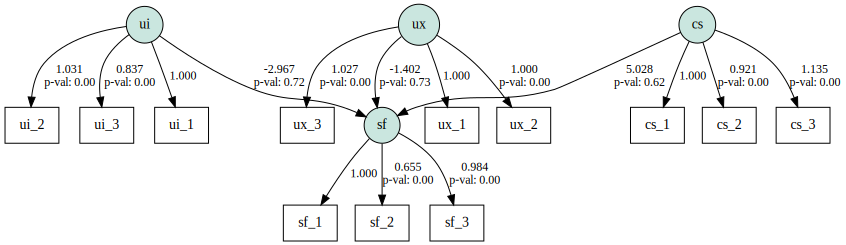

In [ ]:
# パラメータ推定結果の確認
inspect = model.inspect()
print(inspect)
semopy.semplot(model,"graph.png")


In [ ]:
# モデル精度確認
stats = semopy.calc_stats(model)
print(stats.T)

                    Value
DoF             48.000000
DoF Baseline    66.000000
chi2            93.845076
chi2 p-value     0.000085
chi2 Baseline  327.359275
CFI              0.824590
GFI              0.713327
AGFI             0.605825
NFI              0.713327
TLI              0.758811
RMSEA            0.224207
AIC             50.615492
BIC             80.487461
LogLik           4.692254
